# SVM - C & Gamma

---

**C** e **Gamma** são dois parâmetros da SVM que dependendo dos seus valores fazem uma grande diferença na qualidade da classificação, organizei aqui alguns gráficos que exemplificam o impacto que eles causam no funcionamento do algoritmo.


In [1]:
import numpy as np

from sklearn.svm import SVC
from sklearn import datasets
from sklearn import cross_validation as cv

from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

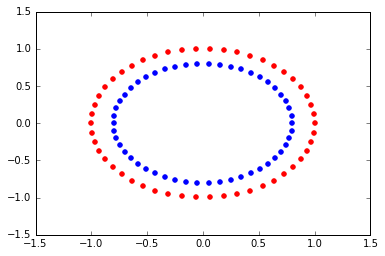

In [2]:
data = datasets.make_circles()

for i, j in zip(data[0], data[1]):
    if j == 1:
        pyplot.scatter(x=i[0], y=i[1], color='b')
    else:
        pyplot.scatter(x=i[0], y=i[1], color='r')

pyplot.show()

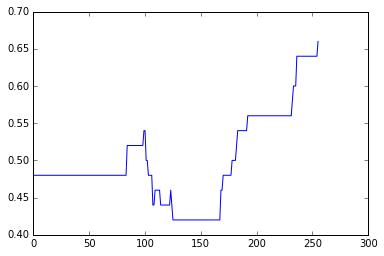

In [4]:
t = np.linspace(0.1, 1, num=256)

results = []
for i in t:
    
    X_train, X_test, Y_train, Y_test = cv.train_test_split(data[0], data[1],
                                                       test_size=0.5,
                                                       random_state=0)
    clf = SVC(C=i, gamma=i)
    clf.fit(X_train, Y_train)
    
    results.append(clf.score(X_test, Y_test))

pyplot.plot(results)
pyplot.show()

In [5]:
c = g = t

C, G = np.meshgrid(c, g)

Z = []

for i, j in zip(C, G):
    z = []
    for k, h in zip(i, j):
        X_train, X_test, Y_train, Y_test = cv.train_test_split(data[0], data[1],
                                                           test_size=0.5,
                                                           random_state=0)
        clf = SVC(C=k, gamma=h)
        clf.fit(X_train, Y_train)

        z.append(clf.score(X_test, Y_test))
    Z.append(z)
    


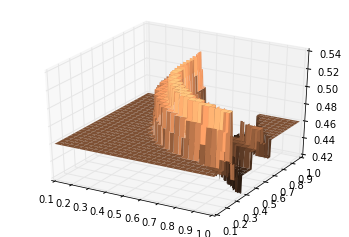

In [6]:
fig = pyplot.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(C, G, Z, cmap=cm.copper,
                linewidth=0.01,
                antialiased=True)
#Z = []